In [4]:
# Statistics
# Miscellaneous
import ase.units as units
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acovf
import pint
from scipy.signal import find_peaks
from pathlib import Path
# from ff_energy.simulations import charmm, plots

ureg = pint.UnitRegistry()

In [5]:
lambda_values = np.arange(0.025, 0.9750001, 0.025)

In [6]:
print(len(lambda_values))

39


In [7]:
text = """
sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda={LAMBDA} -i ele_scale.inp -o ele-{LAMBDA}.log"
sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda={LAMBDA} -i vdw_scale2.inp -o vdw-{LAMBDA}.log"
"""
# text = """
# sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda={LAMBDA} -i ele_scale.inp -o ele-{LAMBDA}.log"
# """
text = """
sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda={LAMBDA} -i vdw_scale.inp -o vdw-{LAMBDA}.log"
"""
for lambda_value in lambda_values:
    _ = text.format(LAMBDA = "{:.3f}".format(lambda_value))
    print(_)


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda=0.025 -i vdw_scale.inp -o vdw-0.025.log"


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda=0.050 -i vdw_scale.inp -o vdw-0.050.log"


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda=0.075 -i vdw_scale.inp -o vdw-0.075.log"


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda=0.100 -i vdw_scale.inp -o vdw-0.100.log"


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM lambda=0.125 -i vdw_scale.inp -o vdw-0.125.log"


sbatch --wrap="module load gcc/gcc-12.2.0-cmake-3.25.1-openmpi-4.1.4; CHARMM=~/chm-nn-water-2000/build/cmake/charmm; $CHARMM

In [8]:
vdw_files = list(Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a_2/results").glob("results-solv-vdw_*dat"))

In [9]:
vdw_log_files = list(Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a_2").glob("vdw*log"))

In [10]:
vdw_files2 = list(Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a_2/results").glob("results-solv-vdw*dat"))

In [11]:
vdw_log_files.sort()

In [12]:
vdw_files.sort()
vdw_files2.sort()

In [13]:
# LAMBDA_V, VDW, VDW_V = [], [], []
# for _ in vdw_files:
#     lambda_v = float(str(_).split("_")[-1][:-4])
#     spl = open(_).readlines()[2].split()
#     res = float(spl[0])
#     fluc = float(spl[1])
#     # print(lambda_v, res)
#     LAMBDA_V.append(lambda_v)
#     VDW.append(res)
#     VDW_V.append(fluc)

In [14]:
LAMBDA_V, VDW, VDW_V = [], [], []
for _ in vdw_log_files:
    lambda_v = float(str(_).split("-")[-1][:-4])
    with open(_) as f:
        lines = f.readlines()
        res = [_ for _ in lines if _.__contains__("EXPAVE")]
        res = res[0].split()
        # print(res)
        expave = res[2][7:]
        expave = float(expave) + float(res[3])
        res = [_ for _ in lines if _.__contains__("EXPFLC")]
        res = res[0].split()
        # print(res)
        var = float(res[2][7:]) + float(res[3])
        var = var**0.5
        # print(var)
        # print(lambda_v, expave, var)
        #EXPFLC
    LAMBDA_V.append(lambda_v)
    VDW.append(expave)
    VDW_V.append(var)

In [15]:
# LAMBDA_V, VDW, VDW_V = [], [], []


# for _ in vdw_files2:
#     lambda_v = float(str(_).split("-")[-1][:-4])
#     results = []
#     for l in open(_).readlines()[2:]:
#         # print(l)
#         spl = l.split()
#         res1 = float(spl[1])
#         res2 = float(spl[2])
#         results.append(res1+res2)
#     n_samples = len(results)
#     n = int(n_samples//1.5)
#     res = np.array(results[n:]).mean()
#     var = np.array(results[n:]).std()
#     # print(lambda_v, res)
#     LAMBDA_V.append(lambda_v)
#     VDW_V.append(var)
#     VDW.append(res)

In [16]:
ele_files = list(Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a_2/results").glob("results-solv-ele*dat"))

In [17]:
ele_files.sort()

In [18]:
LAMBDA, ELE, ELE_V = [], [], []


for _ in ele_files:
    lambda_v = float(str(_).split("_")[-1][:-4])
    results = []
    for l in open(_).readlines()[2:]:
        # print(l)
        spl = l.split()
        res1 = float(spl[1])
        res2 = float(spl[2])
        results.append(res1+res2)
    n_samples = len(results)
    n = int(n_samples//4)
    res = np.array(results[n:]).mean()
    var = np.array(results[n:]).std()**0.5
    # print(lambda_v, res)
    LAMBDA.append(lambda_v)
    ELE_V.append(var)
    ELE.append(res)

In [19]:
ELE = np.array(ELE)
VDW = np.array(VDW)
ELE_V = np.array(ELE_V)
VDW_V = np.array(VDW_V)

In [24]:
ELE

array([ -4.1661473 ,  -4.72059413,  -5.21698934,  -5.65850886,
        -6.05114655,  -6.40251123,  -6.72064835,  -7.01245949,
        -7.2838092 ,  -7.53928862,  -7.78200757,  -8.01397262,
        -8.2366237 ,  -8.45074845,  -8.65682212,  -8.8551891 ,
        -9.04620777,  -9.23027219,  -9.4079683 ,  -9.57993399,
        -9.74682325,  -9.90948182, -10.06890321, -10.22618812,
       -10.3824494 , -10.53884684, -10.69661709, -10.85707312,
       -11.02172997, -11.19227104, -11.37037961, -11.55788079,
       -11.75653754, -11.96808876, -12.19408531, -12.43527882,
       -12.69132375, -12.96059861, -13.24058515])

In [25]:
VDW

array([20.973378, 12.063271,  7.808767,  5.564907,  4.286876,  3.514811,
        3.027124,  2.708523,  2.49504 ,  2.349236,  2.248194,  2.177381,
        2.12733 ,  2.091715,  2.066239,  2.047924,  2.034731,  2.025187,
        2.018277,  2.013251,  2.009615,  2.006956,  2.005035,  2.003631,
        2.002613,  2.001872,  2.00134 ,  2.000946,  2.000671,  2.000467,
        2.00033 ,  2.000219,  2.000153,  2.000105,  2.000068,  2.000041,
        2.000028,  2.000019,  2.000008])

In [20]:
from matplotlib import rcParams

#  matplotlib styles
plt.style.use(["science", "no-latex", "ieee"])
rcParams["text.usetex"] = False
# rcParams["font.sans-serif"] = ["OpenSans"]
rcParams["text.latex.preamble"] = r"\usepackage{sansmath}\sansmath"


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


Integral of the difference: -6.048850971642673
Uncertainty of the integral: 0.1493765859971633


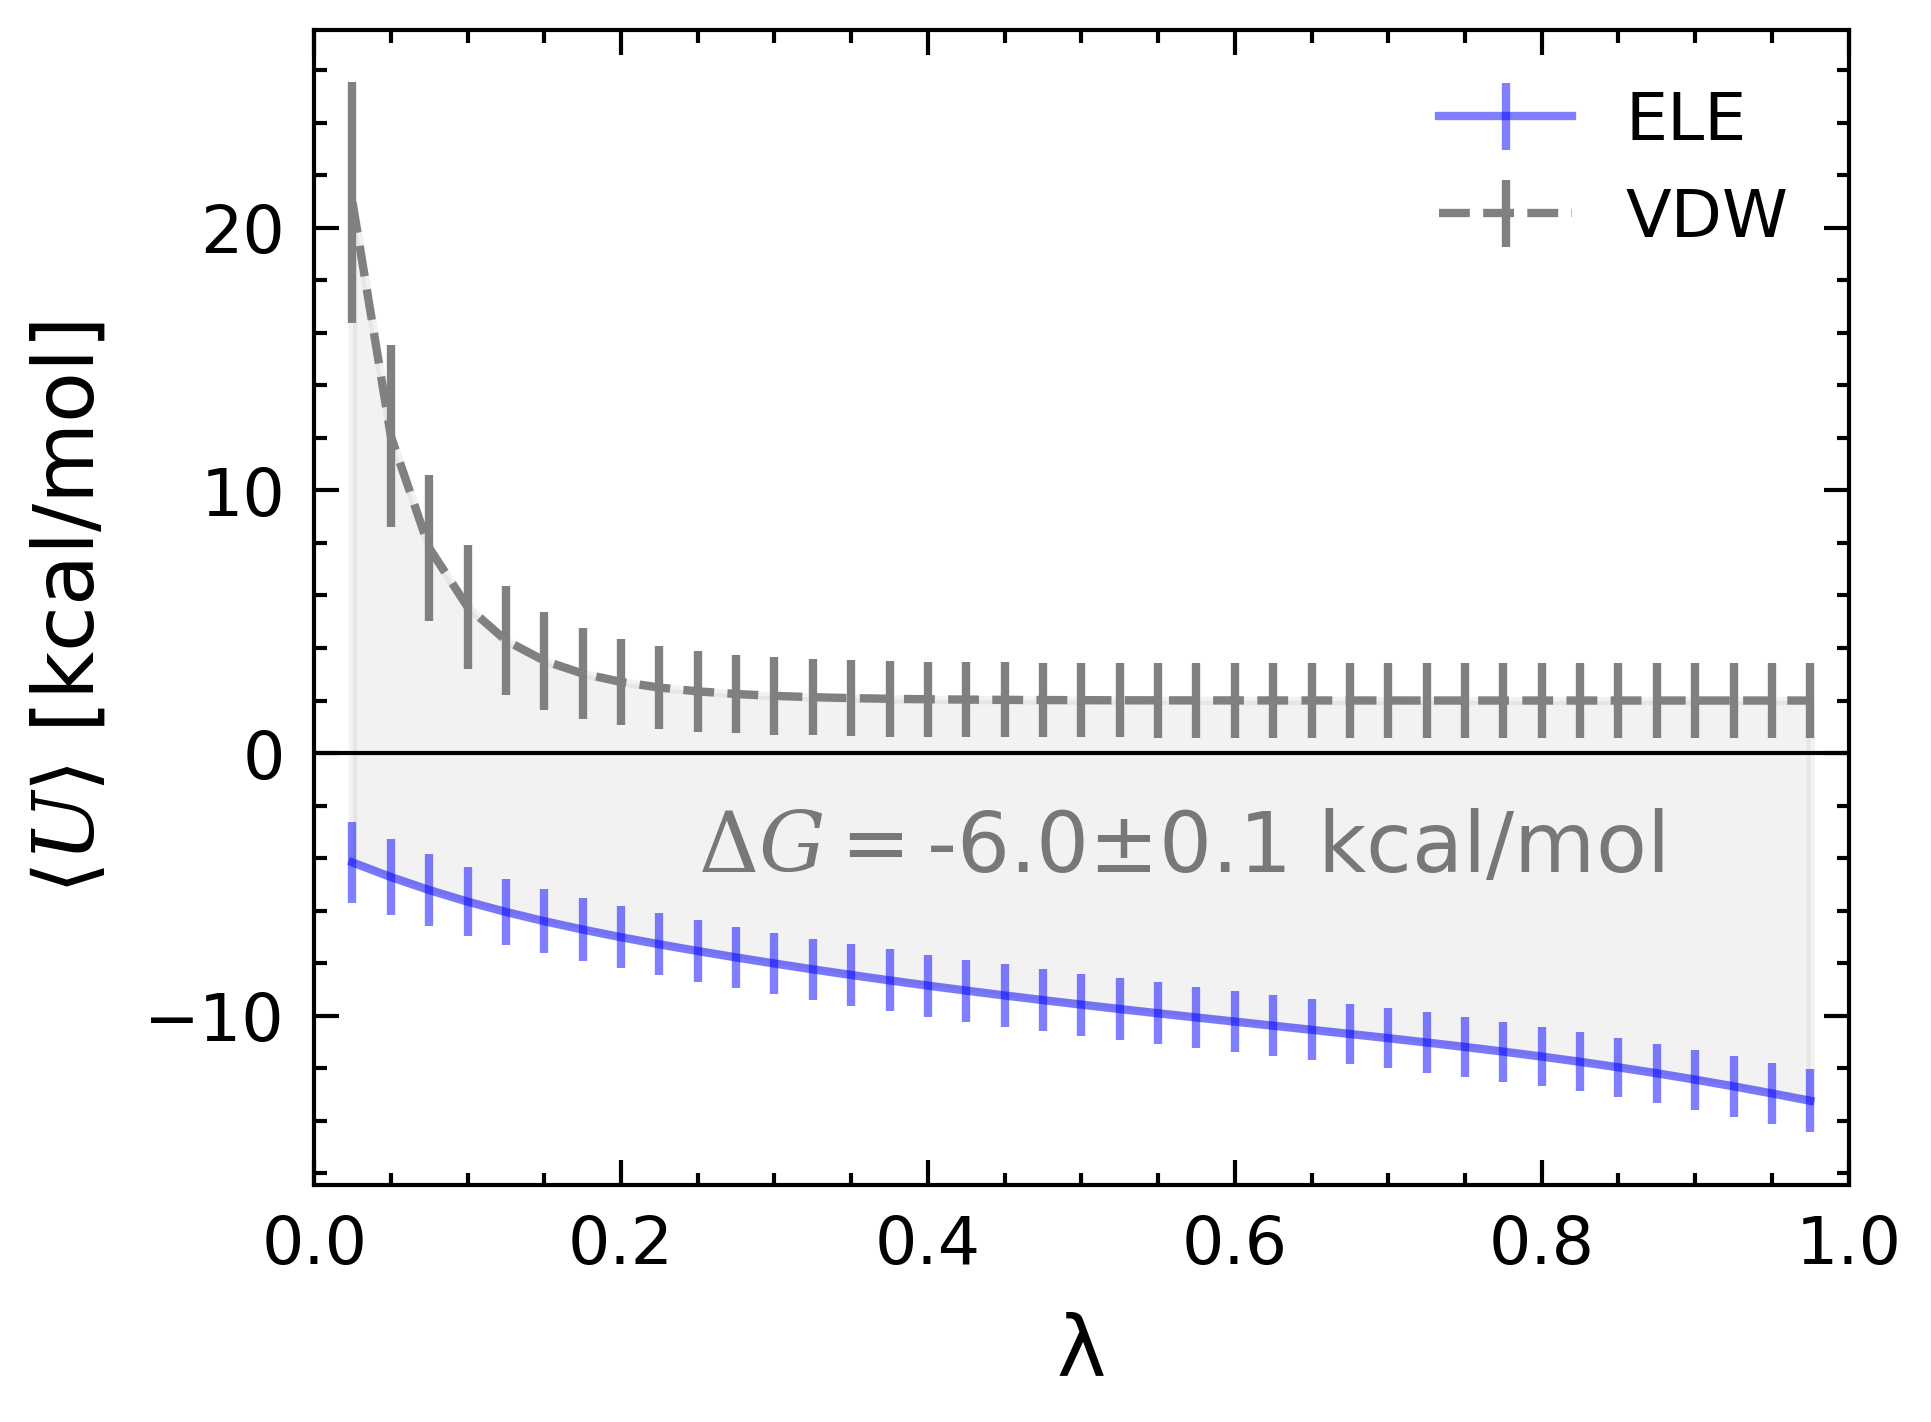

In [21]:
# plt.plot(LAMBDA, ELE)
plt.errorbar(LAMBDA, ELE, yerr = ELE_V, label="ELE", color="blue", alpha=0.5)
# plt.show()
plt.errorbar(LAMBDA_V, VDW, yerr=VDW_V*1, color="gray",label="VDW")
plt.ylabel(r"$\langle \it{U} \rangle$ [kcal/mol]", fontsize=10)
plt.xlabel(r"λ", fontsize=10)
plt.axhline(0, color="k", linewidth=0.5)
plt.xlim(0,1)
import numpy as np
from scipy.integrate import simps
# Step 1: Calculate the difference and the propagated variance
diff = np.trapz(ELE, LAMBDA) + np.trapz(VDW, LAMBDA_V) 
variance_diff = ELE_V + VDW_V  # Variance of difference (since variances add)
# Step 2: Integrate the difference using Simpson's rule
integral_diff = diff #simps(diff, LAMBDA)
# Step 3: Propagate uncertainty in the integral using Simpson's rule
import numpy as np

# Example data: replace with your actual data
delta_x = 0.025  # Spacing between points

# Calculate the total variance using Simpson's rule weights
N = len(variance_diff) - 1  # Number of intervals (assume N is even for Simpson's rule)

# Simpson's rule variance calculation
total_variance = (delta_x ** 2 / 9) * (
    variance_diff[0] + 4 * np.sum(variance_diff[1:N:2]) + 2 * np.sum(variance_diff[2:N-1:2]) + variance_diff[N]
)
statistical_error = np.sqrt(total_variance)

plt.text(0.25, -4.5, "$\Delta G=$"+ f"{integral_diff:.1f}$\pm${statistical_error:.1f} kcal/mol", 
         fontsize=10, color="k",alpha=0.5)
plt.legend()
print("Integral of the difference:", integral_diff)
print("Uncertainty of the integral:", statistical_error)

plt.fill_between(LAMBDA, VDW, ELE, color="gray", alpha=0.1)
plt.legend()

plt.savefig("dGwater.pdf", bbox_inches="tight")

In [941]:
vdw_logs = list(Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a_2").glob("vdw-*.log"))

In [942]:
vdw_logs.sort()